# Exercise 9

Using the dataset in EFIplus_medit.zip:
1. Run agglomerative cluster analysis using different linkage methods based on quantitative environmental variables (see previous exercise), using sites from the Douro and Tejo basins.
2. Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage
3. Plot a dendrogram that clusters the environmental variables instead (columns) using average linkage – discuss how this would help to select variables for e.g. a regression-based analysis. (NOTE: to transpose a dataframe use “name of the dataframe”.T)

### Exercise 1

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # 
from scipy import stats 
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch

In [16]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [17]:
list(df.columns)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

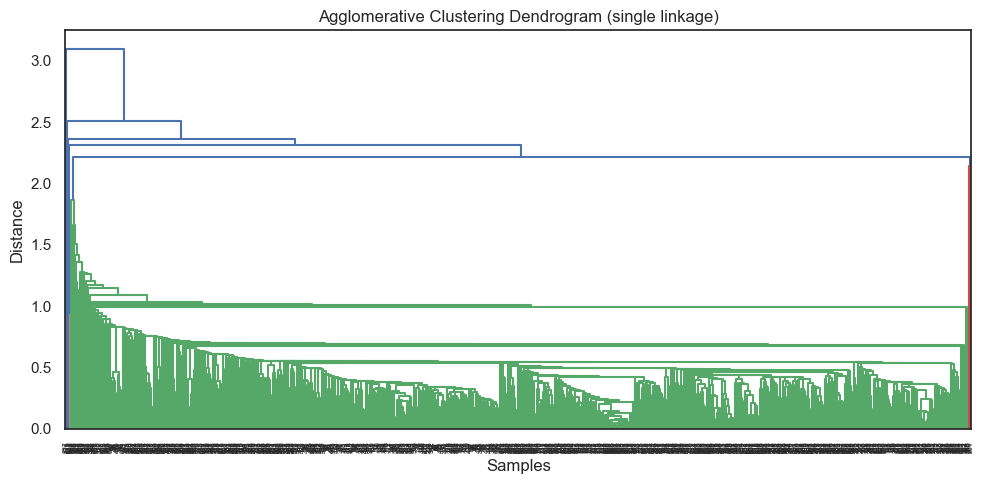

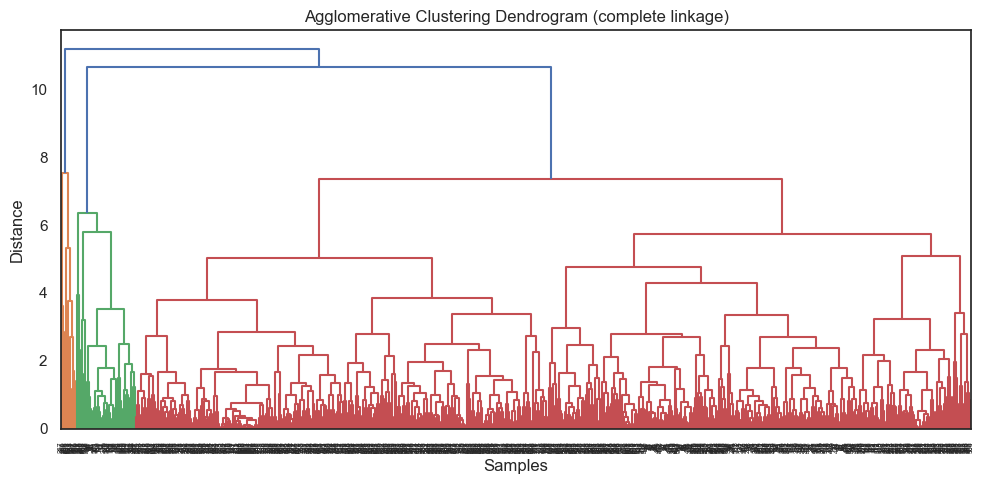

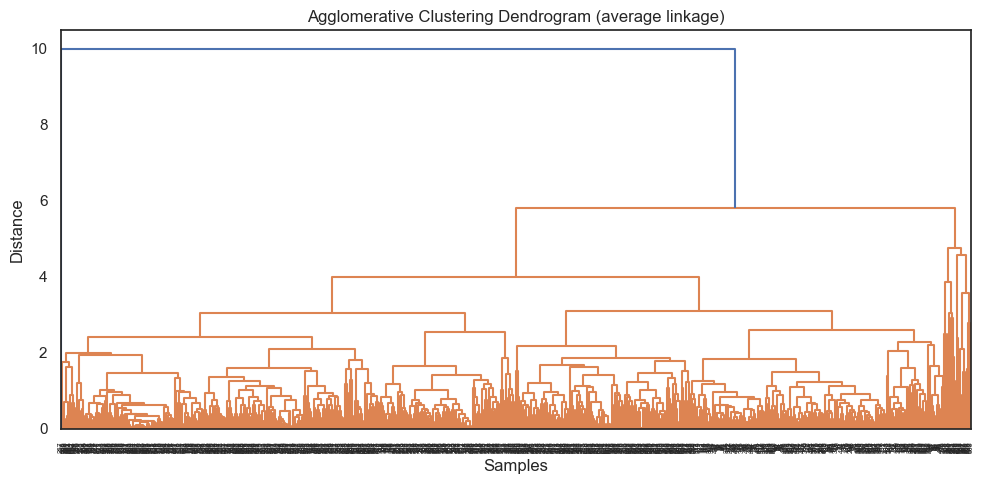

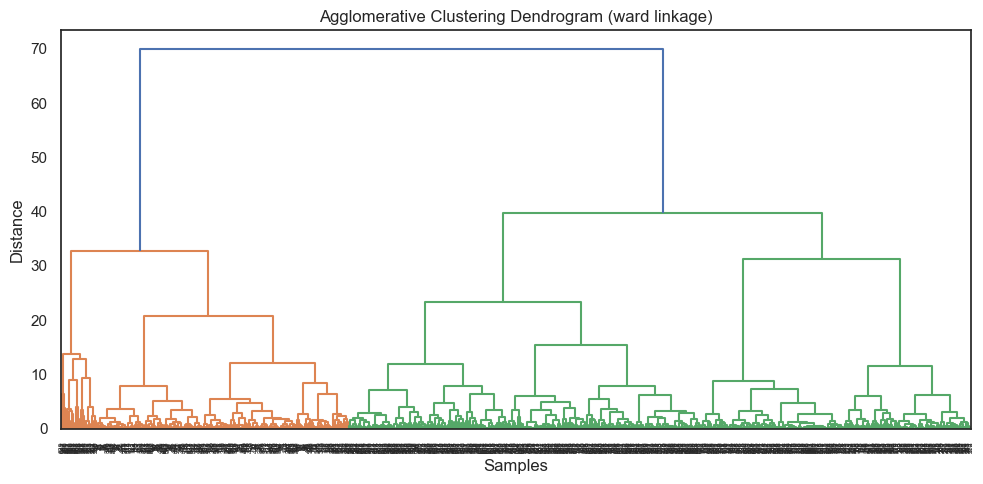

In [18]:
# Filter for Douro and Tejo
df_filtered = df[df['Catchment_name'].isin(['Douro', 'Tejo'])].copy()

# Choose quantitative environmental variables
quant_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch','prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df_quant = df_filtered[quant_vars].dropna()

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_quant)

# Try different linkage methods
methods = ['single', 'complete', 'average', 'ward']

for method in methods:
    plt.figure(figsize=(10, 5))
    plt.title(f"Agglomerative Clustering Dendrogram ({method} linkage)")
    dendrogram(linkage(X_scaled, method=method))
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

### Exercise 2

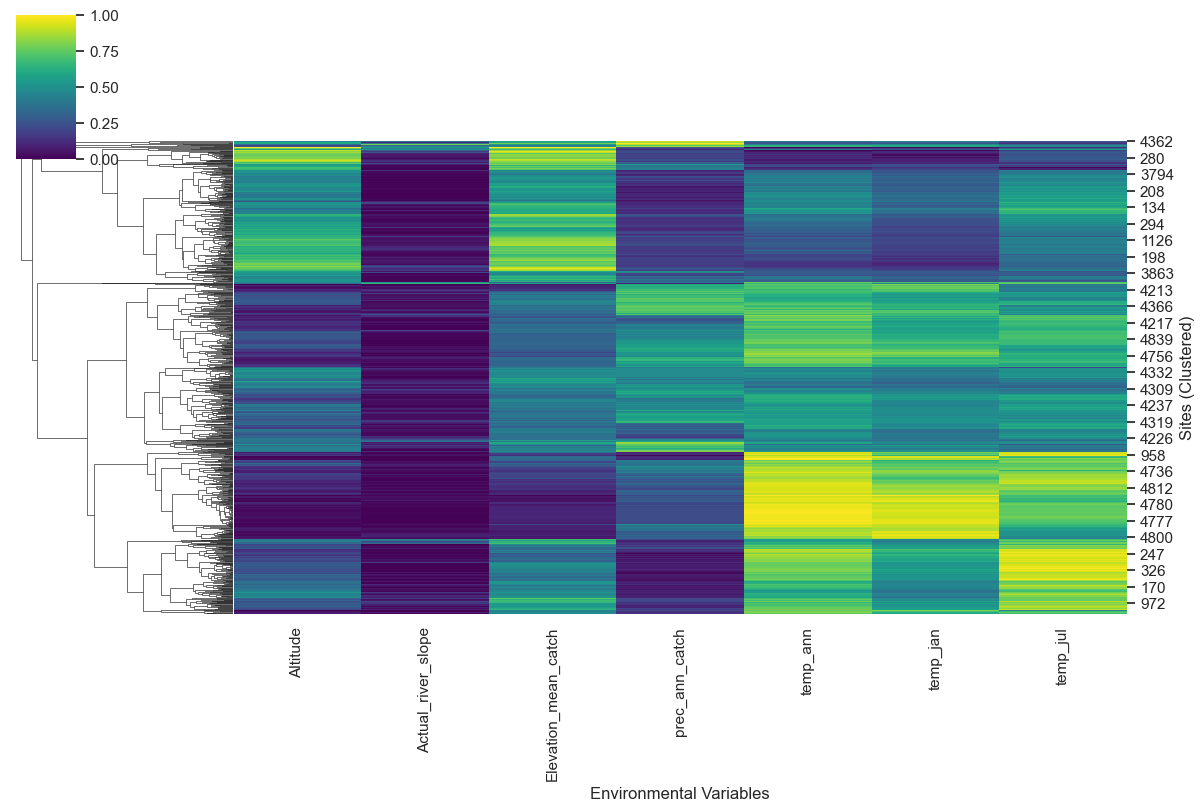

In [21]:
# Select quantitative variables
quant_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch','prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df_quant = df_filtered[quant_vars].dropna()

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_quant)

# Create linkage matrix using average linkage
linkage_matrix = linkage(X_scaled, method='average')

# Plot heatmap with dendrogram
sns.set_theme(style='white')
g = sns.clustermap(
    df_quant, 
    method='average', 
    metric='euclidean', 
    standard_scale=1,
    cmap='viridis', 
    figsize=(12, 8),
    row_cluster=True, 
    col_cluster=False
)

# Set better labels
g.ax_heatmap.set_xlabel("Environmental Variables")
g.ax_heatmap.set_ylabel("Sites (Clustered)")
plt.show()

### Exercise 3

Clustering helps identify redundancy, because clustered variables close to each other suggest correlation. Keeping both in a regression model can lead to multicollinearity. It can also be useful for dimensionality reduction, for example,  we can select one variable per cluster to reduce the number of predictors without losing much information.
It can also tell us how to group certain features, since it helps interpret underlying environmental patterns, for example, altitude and temperature might clustered together due to geographic effects.
By clustering variables first, we can get insight into which predictors to retain, combine, or drop before building regression or machine learning models.

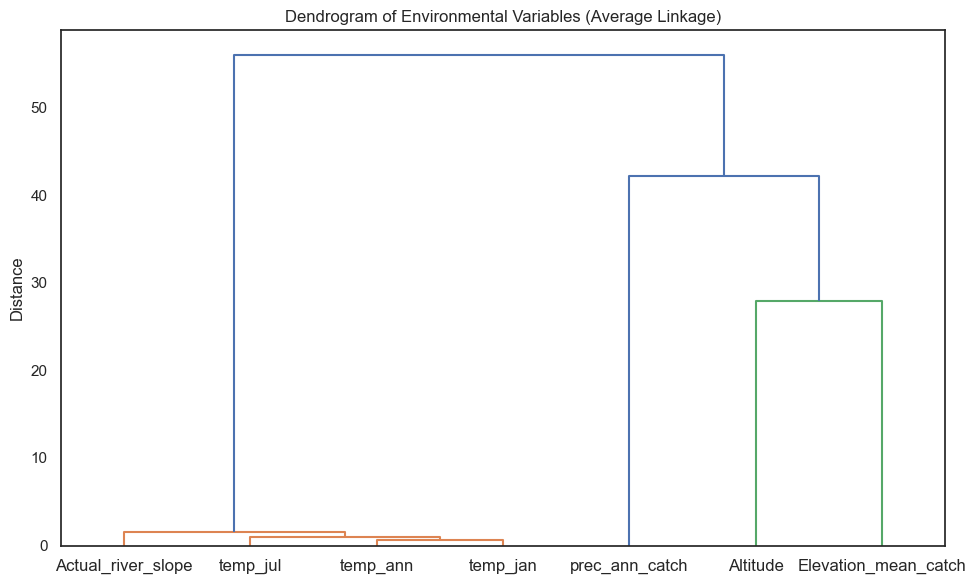

In [20]:
# Select quantitative environmental variables
quant_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch','prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df_quant = df_filtered[quant_vars].dropna()

# Transpose the dataframe so that columns become rows
df_transposed = df_quant.T

# Standardize rows (i.e., each variable) across all sites
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transposed)

# Perform average linkage clustering
linkage_matrix = linkage(X_scaled, method='average')

# Plot
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df_transposed.index, orientation='top')
plt.title('Dendrogram of Environmental Variables (Average Linkage)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()